<a href="https://colab.research.google.com/github/andrecsq/trabalho_simulacao/blob/main/simulacao_eventos_por_individuo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Solução Analítica

In [ ]:
beta = 2
gamma = 0.5
total_population = 100
time_steps = 50
initial_infected = 1

I_inf = (1- gamma/beta)*total_population
V = I_inf/initial_infected - 1
x = beta - gamma

def I(t):
  return I_inf / (1 + V*np.exp(-x*t) )

infected_analytic = np.array([I(t) for t in range(0, time_steps)])
susceptible_analytic = total_population - infected_analytic

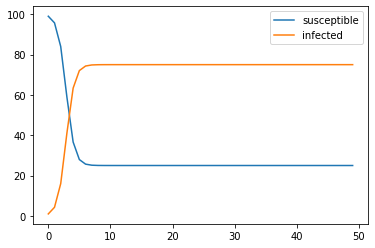

In [ ]:
plt.plot(susceptible_analytic, label='susceptible')
plt.plot(infected_analytic, label='infected')
plt.legend()

## Implementação Eventos

In [ ]:
import queue
from dataclasses import dataclass, field

@dataclass(order=True)
class Event:
  time: float
  event_type: str=field(compare=False)
  x: int=field(compare=False)
  prob: float=field(compare=False, default=None)

In [ ]:
def initialize_population_state(total_population, initial_infected):
  pop_state = [False] * total_population
  for i in range(initial_infected):
    pop_state[i] = True
  return pop_state

def initialize_queue(beta, total_population, initial_infected):
  q = queue.PriorityQueue()
  for i in range(total_population):
    encounter_time = np.random.exponential(1/beta)
    encounter_event = Event(encounter_time, 'encounter', i)
    q.put(encounter_event)
  
  for i in range(initial_infected):
    cure_time = np.random.exponential(1/gamma)
    cure_event = Event(cure_time, 'cure', i)
    q.put(cure_event)

  return q

In [ ]:
def try_infection(gamma, e, is_infected, q):
  time = e.time
  infected = e.x
  
  is_infected[infected] = True # Now infected

  cure_time = np.random.exponential(1/gamma) # Creates random cure time
  cure_event_infected = Event(e.time + cure_time, 'cure', infected) # Create Event objects

  q.put(cure_event_infected) # Add events to queue
  events.append(Event(time, 'infection', infected))

def generate_new_encounter(beta, e, q):
  encounter_time = e.time + np.random.exponential(1/beta)
  q.put(Event(encounter_time, 'encounter', e.x))

def handle_cure(e, is_infected):
  is_infected[e.x] = False 
  events.append(Event(e.time, 'cure', e.x))

# def handle_infection(beta, gamma, e, is_infected, q, null_infections):    
#   if is_infected[e.x] and not is_infected[e.y]:
#     try_infection(gamma, e, is_infected, q) 
#     if DEBUG:
#       print(f"{null_infections} events without infection")
#     null_infections = -1
#   generate_new_encounter(beta, e, q)
#   return null_infections + 1

In [ ]:
events = []

def print_state_string(infected_array):
  is_infected_formatted = "".join([str(int(i)) for i in infected_array])
  print(is_infected_formatted)

def simulate_epidemic(beta, gamma, total_population, initial_infected, max_time):
  is_infected = initialize_population_state(total_population, initial_infected)
  q = initialize_queue(beta, total_population, initial_infected)
  times = []
  amount_infected = []


  null_infections = 0
  while not q.empty():
    e = q.get()
    
    if e.time > max_time:
      return times, amount_infected
    if e.event_type == 'cure':
      handle_cure(e, is_infected)     
    elif e.event_type == 'encounter':
      if not is_infected[e.x]:   
        try_infection(gamma, e, is_infected, q)    
      generate_new_encounter(beta, e, q) 

    times.append(e.time)
    infected = sum(is_infected)
    amount_infected.append(infected)

    if infected == 0:
      break
  
  return times, amount_infected

In [ ]:
contacts_per_unit_time = 2
probability_of_infection = 1

beta = probability_of_infection
gamma = 0.5

total_population = 100
initial_infected = 1
max_time = 200

In [ ]:
times, amount_infected = simulate_epidemic(beta, 
                                          gamma, 
                                          total_population,
                                          initial_infected,
                                          max_time)

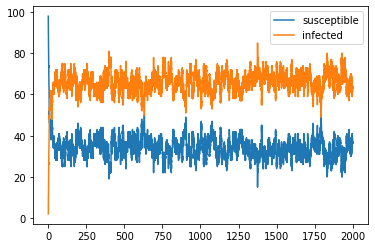

In [ ]:
amount_susceptible = total_population - np.array(amount_infected)
new_times = np.array(times) * 10
plt.plot(new_times, amount_susceptible, label='susceptible')
plt.plot(new_times, amount_infected, label='infected')
plt.legend()

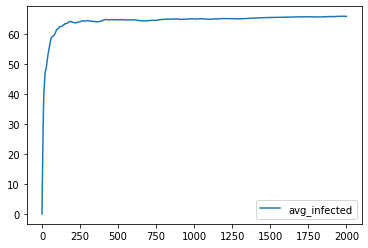

In [ ]:
avg_infected = [sum(amount_infected[0:i])/(i+1) for i in range(len(amount_susceptible))]
plt.plot(new_times, avg_infected, label='avg_infected')
plt.legend()